In [ ]:
!kaggle datasets download -d mohnishsaiprasad/forest-fire-images

Dataset URL: https://www.kaggle.com/datasets/mohnishsaiprasad/forest-fire-images
License(s): other
 99% 382M/385M [00:03<00:00, 172MB/s]
100% 385M/385M [00:03<00:00, 127MB/s]


In [ ]:
!unzip forest-fire-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Train_Data/Fire/F_0.jpg  
  inflating: Data/Train_Data/Fire/F_1.jpg  
  inflating: Data/Train_Data/Fire/F_10.jpg  
  inflating: Data/Train_Data/Fire/F_100.jpg  
  inflating: Data/Train_Data/Fire/F_1000.jpg  
  inflating: Data/Train_Data/Fire/F_1001.jpg  
  inflating: Data/Train_Data/Fire/F_1002.jpg  
  inflating: Data/Train_Data/Fire/F_1003.jpg  
  inflating: Data/Train_Data/Fire/F_1004.jpg  
  inflating: Data/Train_Data/Fire/F_1005.jpg  
  inflating: Data/Train_Data/Fire/F_1006.jpg  
  inflating: Data/Train_Data/Fire/F_1007.jpg  
  inflating: Data/Train_Data/Fire/F_1008.jpg  
  inflating: Data/Train_Data/Fire/F_1009.jpg  
  inflating: Data/Train_Data/Fire/F_101.jpg  
  inflating: Data/Train_Data/Fire/F_1010.jpg  
  inflating: Data/Train_Data/Fire/F_1011.jpg  
  inflating: Data/Train_Data/Fire/F_1012.jpg  
  inflating: Data/Train_Data/Fire/F_1013.jpg  
  inflating: Data/Train_Data/Fire/F_1014.jpg  
  inflating: Data/T

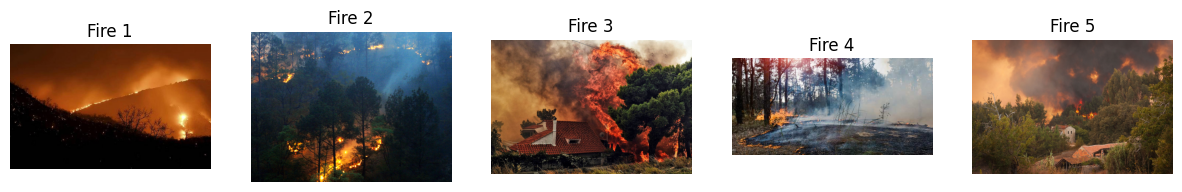

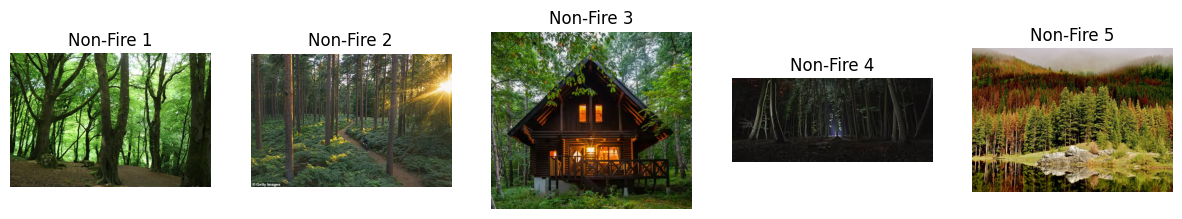

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Paths
fire_path = "/content/Data/Test_Data/Fire"
non_fire_path = "/content/Data/Test_Data/Non_Fire"

# Function to display sample images
def display_samples(image_path, title, n=5):
    # Get image file names
    image_files = [f for f in os.listdir(image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    # Select random files
    sample_files = random.sample(image_files, min(n, len(image_files)))

    # Display images
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img = Image.open(os.path.join(image_path, file))
        plt.subplot(1, len(sample_files), i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i + 1}")
        plt.axis("off")
    plt.show()

# Display samples from both directories
display_samples(fire_path, "Fire")
display_samples(non_fire_path, "Non-Fire")


In [ ]:
import os
from PIL import Image

def clean_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)  # Try to open the image
                img.verify()  # Verify that it is an image
            except (IOError, SyntaxError):
                print(f"Removing corrupted file: {file_path}")
                os.remove(file_path)  # Remove invalid file

# Clean both training and test directories
clean_directory('/content/Data/Train_Data')
clean_directory('/content/Data/Test_Data')


Removing corrupted file: /content/Data/Train_Data/Fire/F_901.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_83.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_878.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_899.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_614.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_887.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_74.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_678.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_682.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_714.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_755.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_66.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_849.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_883.jpg
Removing corrupted file: /content/Data/Train_Data/Fire/F_824.jpg
Removing corrupted file: /co

# Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/Data/Train_Data',
                                                 target_size = (64, 64), # Size of image
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 4611 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Data/Test_Data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 50 images belonging to 2 classes.


# Build CNN

In [ ]:
import tensorflow as tf

In [ ]:
cnn = tf.keras.models.Sequential() # sequence of layers

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


145/145 ━━━━━━━━━━━━━━━━━━━━ 35s 198ms/step - accuracy: 0.8089 - loss: 0.4283 - val_accuracy: 0.8000 - val_loss: 0.5343
Epoch 2/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9106 - loss: 0.2156 - val_accuracy: 0.8600 - val_loss: 0.4260
Epoch 3/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9232 - loss: 0.1998 - val_accuracy: 0.8800 - val_loss: 0.3388
Epoch 4/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9284 - loss: 0.1837 - val_accuracy: 0.8000 - val_loss: 0.5525
Epoch 5/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.9265 - loss: 0.1964 - val_accuracy: 0.9000 - val_loss: 0.2539
Epoch 6/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.9460 - loss: 0.1453 - val_accuracy: 0.8800 - val_loss: 0.3752
Epoch 7/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.9477 - loss: 0.1370 - val_accuracy: 0.9200 - val_loss: 0.2433
Epoch 8/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9581 - loss: 0.1150 - val

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluasi pada data uji
test_set.reset()  # Reset iterator
predictions = cnn.predict(test_set, steps=len(test_set), verbose=1)
predicted_classes = (predictions > 0.5).astype("int32")  # Konversi prediksi ke kelas

# Mendapatkan label sebenarnya
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())  # Nama kelas

# Laporan klasifikasi
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Matriks kebingungan
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
Classification Report:
              precision    recall  f1-score   support

        Fire       0.42      0.44      0.43        25
    Non_Fire       0.42      0.40      0.41        25

    accuracy                           0.42        50
   macro avg       0.42      0.42      0.42        50
weighted avg       0.42      0.42      0.42        50

Confusion Matrix:
[[11 14]
 [15 10]]


In [ ]:
# Simpan model ke file .h5
model_path = "forest_fire_model.h5"
cnn.save(model_path)
print(f"Model saved to {model_path}")

Model saved to forest_fire_model.h5


# Testing Data

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Fungsi untuk mendeteksi satu gambar
def predict_image(model, img_path, target_size=(64, 64)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image to match training data

    # Prediksi menggunakan model
    prediction = model.predict(img_array)
    class_label = "Non Fire" if prediction[0][0] > 0.5 else "Fire"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Tampilin gambar yang diprediksi
    plt.imshow(img)
    plt.title(f"Prediction: {class_label} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

# Coba pake gambar yang baru
own_image_path = "/content/kebakaran hutan.jpg"

# Testing model dengan gambar baru
predict_image(cnn, own_image_path)


FileNotFoundError: [Errno 2] No such file or directory: '/content/kebakaran hutan.jpg'

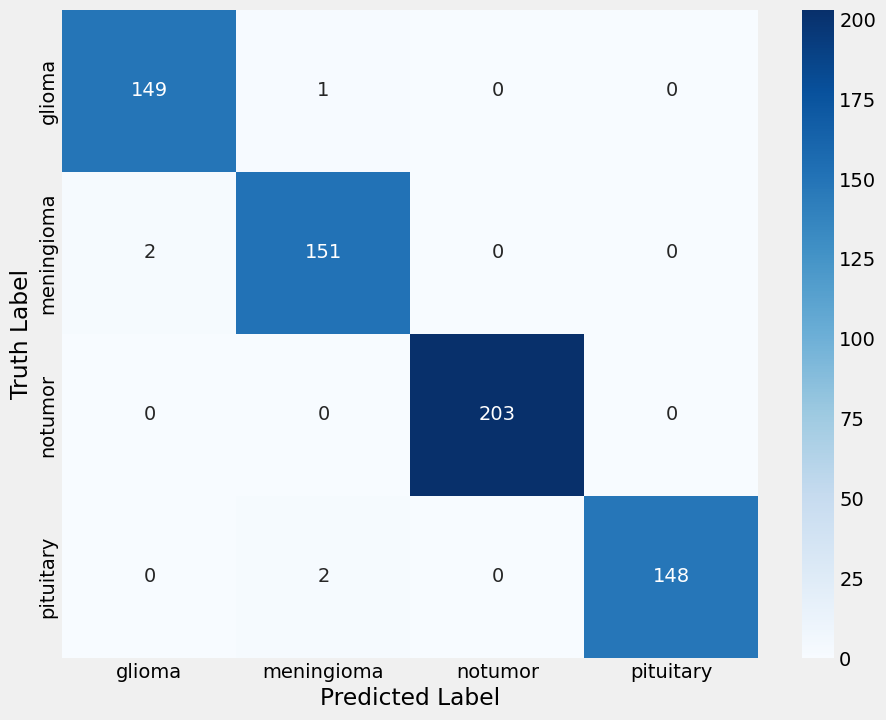